## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Data Collection and Processing

In [ ]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("Loan_dataset.csv")

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
loan_dataset

,Loan_ID,Gender,Marriage Status,Number of Dependant,Education Level,Are they self employed,Applicants income,Co-applicants income,Loan Amount,Loan Duration,Creditability,Property Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID                    0
Gender                    13
Marriage Status            3
Number of Dependant       15
Education Level            0
Are they self employed    32
Applicants income          0
Co-applicants income       0
Loan Amount               22
Loan Duration             14
Creditability             50
Property Area              0
Loan_Status                0
dtype: int64

In [ ]:
# Impute missing values for Gender
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
loan_dataset['Marriage Status'].fillna(loan_dataset['Marriage Status'].mode()[0],inplace=True)

# Impute missing values for Self_Employed
loan_dataset['Are they self employed'].fillna(loan_dataset['Are they self employed'].mode()[0],inplace=True)

# Impute missing values for Dependents
loan_dataset['Number of Dependant'].fillna(loan_dataset['Number of Dependant'].mode()[0],inplace=True)

# Impute missing values for Creditability
loan_dataset['Creditability'].fillna(loan_dataset['Creditability'].mode()[0],inplace=True)

# Impute missing values for LoanAmount
loan_dataset['Loan Amount'] = loan_dataset['Loan Amount'].fillna(loan_dataset['Loan Amount'].mean())

# Impute missing values for Loan_Amount_Term
loan_dataset['Loan Duration'] = loan_dataset['Loan Duration'].fillna(loan_dataset['Loan Duration'].mean())




In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID                   0
Gender                    0
Marriage Status           0
Number of Dependant       0
Education Level           0
Are they self employed    0
Applicants income         0
Co-applicants income      0
Loan Amount               0
Loan Duration             0
Creditability             0
Property Area             0
Loan_Status               0
dtype: int64

In [ ]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head(10)

,Loan_ID,Gender,Marriage Status,Number of Dependant,Education Level,Are they self employed,Applicants income,Co-applicants income,Loan Amount,Loan Duration,Creditability,Property Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,0


In [ ]:
# Dependent column values
loan_dataset['Number of Dependant'].value_counts()

0     360
1     102
2     101
3+     51
Name: Number of Dependant, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
# dependent values
loan_dataset['Number of Dependant'].value_counts()

0    360
1    102
2    101
4     51
Name: Number of Dependant, dtype: int64

## Data Visualization

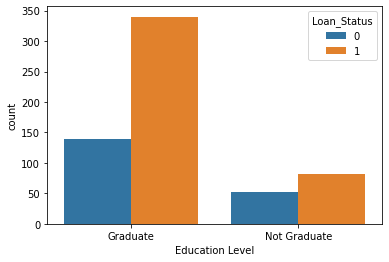

In [ ]:
# education & Loan Status
sns.countplot(x='Education Level',hue='Loan_Status',data=loan_dataset)

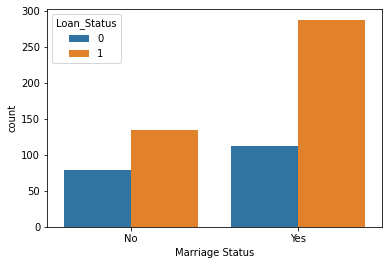

In [ ]:
# marital status & Loan Status
sns.countplot(x='Marriage Status',hue='Loan_Status',data=loan_dataset)

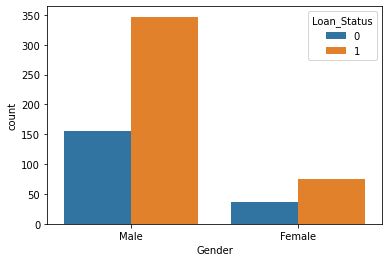

In [ ]:
# Gender & Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

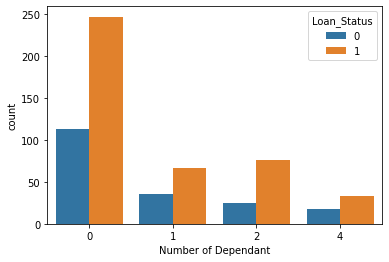

In [ ]:
# Dependents & Loan Status
sns.countplot(x='Number of Dependant',hue='Loan_Status',data=loan_dataset)

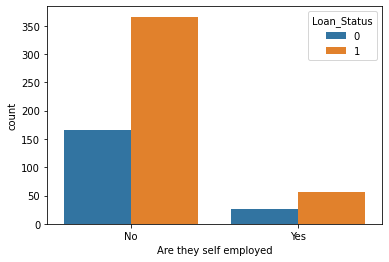

In [ ]:
# Self_Employed & Loan Status
sns.countplot(x='Are they self employed',hue='Loan_Status',data=loan_dataset)

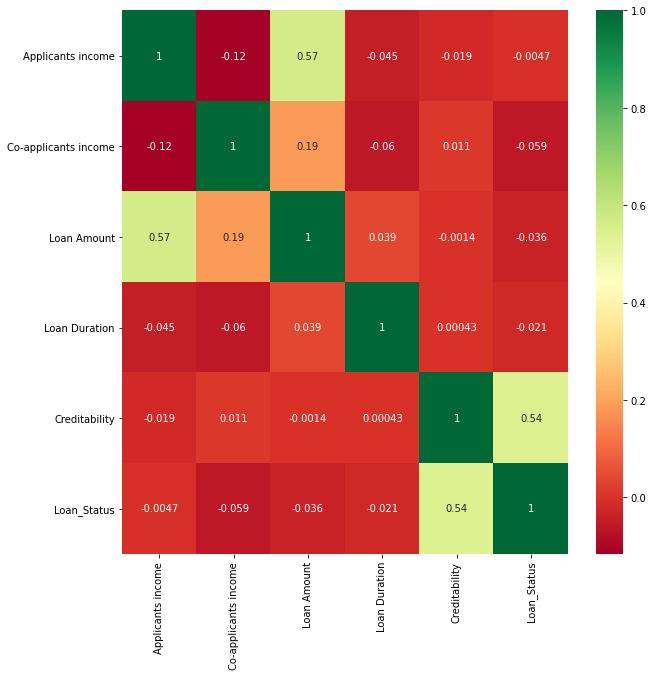

In [ ]:
corrmat = loan_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(loan_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'Marriage Status':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Are they self employed':{'No':0,'Yes':1},
                 'Property Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education Level':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    int64  
 2   Marriage Status         614 non-null    int64  
 3   Number of Dependant     614 non-null    object 
 4   Education Level         614 non-null    int64  
 5   Are they self employed  614 non-null    int64  
 6   Applicants income       614 non-null    int64  
 7   Co-applicants income    614 non-null    float64
 8   Loan Amount             614 non-null    float64
 9   Loan Duration           614 non-null    float64
 10  Creditability           614 non-null    float64
 11  Property Area           614 non-null    int64  
 12  Loan_Status             614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [ ]:
loan_dataset

,Loan_ID,Gender,Marriage Status,Number of Dependant,Education Level,Are they self employed,Applicants income,Co-applicants income,Loan Amount,Loan Duration,Creditability,Property Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [ ]:
#drop the uniques loan id
loan_dataset.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
loan_dataset.head(10)

,Gender,Marriage Status,Number of Dependant,Education Level,Are they self employed,Applicants income,Co-applicants income,Loan Amount,Loan Duration,Creditability,Property Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,4,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [ ]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Marriage Status  ... Creditability  Property Area
0         1                0  ...           1.0              2
1         1                1  ...           1.0              0
2         1                1  ...           1.0              2
3         1                1  ...           1.0              2
4         1                0  ...           1.0              2
..      ...              ...  ...           ...            ...
609       0                0  ...           1.0              0
610       1                1  ...           1.0              0
611       1                1  ...           1.0              2
612       1                1  ...           1.0              2
613       0                0  ...           0.0              1

[614 rows x 11 columns]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


## Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.02032609 0.02003505 0.05965276 0.01991526 0.02116731 0.18040633
 0.11757702 0.18289286 0.04963486 0.27975485 0.04863761]


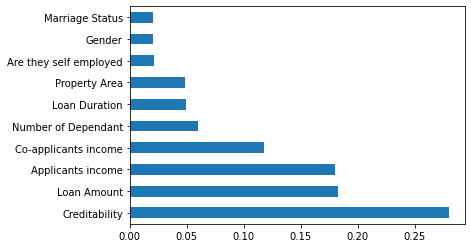

In [ ]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


## Data Standardization

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
standardized_data=scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.47234264 -1.37208932 -0.6827291  ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.41173269
  -1.31851281]
 [ 0.47234264  0.72881553 -0.6827291  ...  0.27985054  0.41173269
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.96764754 ...  0.27985054  0.41173269
   1.22329839]
 [-2.11710719 -1.37208932 -0.6827291  ...  0.27985054 -2.42876026
  -0.04760721]]


In [ ]:
X=standardized_data
Y=loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

[[ 0.47234264 -1.37208932 -0.6827291  ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.41173269
  -1.31851281]
 [ 0.47234264  0.72881553 -0.6827291  ...  0.27985054  0.41173269
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.96764754 ...  0.27985054  0.41173269
   1.22329839]
 [-2.11710719 -1.37208932 -0.6827291  ...  0.27985054 -2.42876026
  -0.04760721]]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


Train Test Split

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (491, 11) (123, 11)


## Model Training

SVM Model

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)
y_predict4=classifier.predict(X_test)

In [ ]:
print("Evaluation Score:",f1_score(Y_test,y_predict4))
print("Accuracy:",accuracy_score(Y_test,y_predict4))
pd.crosstab(Y_test,y_predict4)

Evaluation Score: 0.8723404255319148
Accuracy: 0.8048780487804879


col_0,0,1
Loan_Status,,
0,17,21
1,3,82


Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()

In [ ]:
logistic.fit(X_train, Y_train)
X_test_prediction1 = logistic.predict(X_test)

In [ ]:
a1 = accuracy_score(X_test_prediction1,Y_test)
f1 = f1_score(X_test_prediction1,Y_test, average="macro")
p1 = precision_score(X_test_prediction1,Y_test, average="macro")
r1 = recall_score(X_test_prediction1,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
pd.crosstab(Y_test,X_test_prediction1)

accuracy score :  0.8048780487804879
f1 score :  0.7354838709677419


col_0,0,1
Loan_Status,,
0,18,20
1,4,81


Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier()

In [ ]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
X_test_prediction2= tree.predict(X_test)

In [ ]:
a1 = accuracy_score(X_test_prediction2,Y_test)
f1 = f1_score(X_test_prediction2,Y_test, average="macro")
p1 = precision_score(X_test_prediction2,Y_test, average="macro")
r1 = recall_score(X_test_prediction2,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(Y_test,X_test_prediction2)

accuracy score :  0.7967479674796748
f1 score :  0.7753014249177932
precision score :  0.7947368421052632
recall score :  0.7665173572228443


col_0,0,1
Loan_Status,,
0,30,8
1,17,68


RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest=RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X_test_prediction_Rforest= forest.predict(X_test)

In [ ]:
a1 = accuracy_score(X_test_prediction_Rforest,Y_test)
f1 = f1_score(X_test_prediction_Rforest,Y_test, average="macro")
p1 = precision_score(X_test_prediction_Rforest,Y_test, average="macro")
r1 = recall_score(X_test_prediction_Rforest,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(Y_test,X_test_prediction_Rforest)

accuracy score :  0.7804878048780488
f1 score :  0.7230884682731593
precision score :  0.7102167182662539
recall score :  0.7490829053558328


col_0,0,1
Loan_Status,,
0,20,18
1,9,76


Comment:From the above  Models i.e. SVM,Logistic Regression, Decision Tree and Random Forest the accuracy and f1 score of SVM is better then other Models

## Predictive Model

In [ ]:
input_data=(1,	1,	1	,1,	0,	12841,	10968.0,	349.000000,	360.0	,1.0,	1	)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=classifier.predict(std_data)
print(prediction)

[1]


In [ ]:
input_data=(1	,1,	4	,1,	0	,3036,	2504.0,	158.000000,	360.0	,0.0,	1	)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=classifier.predict(std_data)
print(prediction)

[0]


## Save Model

In [ ]:
import joblib
joblib.dump(classifier,"Loan Status Prediction.pkl")

['Loan Status Prediction.pkl']

In [ ]:
model=joblib.load("Loan Status Prediction.pkl")

## Prediction

In [ ]:
prediction_df=pd.read_csv("Loandataset_test.csv")
prediction_df

,Gender,Marriage Status,Number of Dependant,Education Level,Are they self employed,Applicants income,Co-applicants income,Loan Amount,Loan Duration,Creditability,Property Area
0,Male,No,0,Graduate,No,5849,0,288,360,1,Urban
1,Male,Yes,4,Graduate,No,3036,2504,158,360,0,Semi-Urban


In [ ]:
prediction_df.replace({'Marriage Status':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Are they self employed':{'No':0,'Yes':1},
                 'Property Area':{'Rural':0,'Semi-Urban':1,'Urban':2},'Education Level':{'Graduate':1,'Non graduate':0}},inplace=True)
prediction_df

,Gender,Marriage Status,Number of Dependant,Education Level,Are they self employed,Applicants income,Co-applicants income,Loan Amount,Loan Duration,Creditability,Property Area
0,1,0,0,1,0,5849,0,288,360,1,2
1,1,1,4,1,0,3036,2504,158,360,0,1


In [ ]:
std_data=scaler.transform(prediction_df)
std_data

array([[ 0.47234264, -1.37208932, -0.6827291 ,  0.52836225, -0.39260074,
         0.07299082, -0.55448733,  1.68619168,  0.27985054,  0.41173269,
         1.22329839],
       [ 0.47234264,  0.72881553,  2.61802418,  0.52836225, -0.39260074,
        -0.38784963,  0.30191352,  0.13800137,  0.27985054, -2.42876026,
        -0.04760721]])

In [ ]:
result=model.predict(std_data)
print(result)

[1 0]
